In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Book Recommendation System

We have two types of recommendation systems:

1] Content-Based

2] Collaborative Filtering based

In our case we will use collaborative filtering, there are two types of approaches when it comes to collaborative filtering.

1] Memory based approach

2] Model-based approach

We are using a Model-based Approach because of the sparse matrix.

We are building this model using surprise Libary which is especially build for recommendation systems.

In [25]:
!pip install surprise

     |████████████████████████████████| 11.8MB 251kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670920 sha256=8e21728ba8b6723849db5dfa104d704f14d0eea7690fc574fd3e700365144227
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [26]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from surprise import NormalPredictor, Reader, Dataset, accuracy, SVD, SVDpp, KNNBasic, CoClustering, SlopeOne
from surprise.model_selection import cross_validate, KFold, GridSearchCV, train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## Reading and Understanding the data

In [27]:
df_booktags=pd.read_csv('/content/drive/My Drive/Book_recommendation_aasignment/book_tags.csv')
df_books=pd.read_csv('/content/drive/My Drive/Book_recommendation_aasignment/books.csv')
df_ratings=pd.read_csv('/content/drive/My Drive/Book_recommendation_aasignment/ratings.csv')
df_tags=pd.read_csv('/content/drive/My Drive/Book_recommendation_aasignment/tags.csv')
to_read_csv=pd.read_csv('/content/drive/My Drive/Book_recommendation_aasignment/to_read.csv')



In [28]:
df_booktags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [29]:
df_books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [30]:
df_ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [31]:
df_tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [32]:
to_read_csv.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


In [33]:
to_read_csv.shape

(912705, 2)

In [34]:
df_books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

## Data Merging

In [35]:
df=df_books.merge(df_ratings,on='book_id')

In [36]:
df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,user_id,rating
0,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,314,3
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,588,1
2,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,2077,2
3,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,2487,3
4,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,2900,3


In [37]:
df[df['book_id']==1]

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,user_id,rating
1400,27,1,1,41335427,275,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...,314,5
1401,27,1,1,41335427,275,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...,439,3
1402,27,1,1,41335427,275,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...,588,5
1403,27,1,1,41335427,275,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...,1169,4
1404,27,1,1,41335427,275,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...,1185,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,27,1,1,41335427,275,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...,51460,3
1496,27,1,1,41335427,275,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...,51480,1
1497,27,1,1,41335427,275,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...,51838,5
1498,27,1,1,41335427,275,439785960,9.780440e+12,"J.K. Rowling, Mary GrandPré",2005.0,Harry Potter and the Half-Blood Prince,Harry Potter and the Half-Blood Prince (Harry ...,eng,4.54,1678823,1785676,27520,7308,21516,136333,459028,1161491,https://images.gr-assets.com/books/1361039191m...,https://images.gr-assets.com/books/1361039191s...,52036,2


In [38]:
df_booktags.rename({'goodreads_book_id':'book_id'},axis=1,inplace=True)

In [39]:
df_booktags

,book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716
...,...,...,...
999907,33288638,21303,7
999908,33288638,17271,7
999909,33288638,1126,7
999910,33288638,11478,7


In [40]:

df=df.merge(df_booktags,on='book_id')

In [41]:
df.shape

(7970100, 27)

In [42]:
to_read_csv.shape

(912705, 2)

In [43]:
df=df.merge(df_tags,on='tag_id')

## Check for null values in our important columns, eg. book_id, user_id, rating, etc.

In [46]:
df.isnull().sum()

id                                 0
book_id                            0
best_book_id                       0
work_id                            0
books_count                        0
isbn                           87900
isbn13                         39800
authors                            0
original_publication_year      10000
original_title                178100
title                              0
language_code                1113900
average_rating                     0
ratings_count                      0
work_ratings_count                 0
work_text_reviews_count            0
ratings_1                          0
ratings_2                          0
ratings_3                          0
ratings_4                          0
ratings_5                          0
image_url                          0
small_image_url                    0
user_id                            0
rating                             0
tag_id                             0
count                              0
t

## Let's do some analysis on ratings

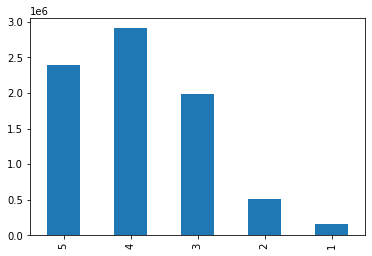

In [47]:
df['rating'].value_counts().sort_index(ascending=False).plot(kind='bar')


We can see we have less number of 1 ratings.

## We are taking one condition that if users with less than 200 ratings, and books with less than 100 ratings are excluded.

In [48]:
counts1 = df['user_id'].value_counts()
ratings = df[df['user_id'].isin(counts1[counts1 >= 200].index)]
counts2 = df['rating'].value_counts()
ratings = df[df['rating'].isin(counts2[counts2 >= 100].index)]

In [49]:
ratings.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,user_id,rating,tag_id,count,tag_name
0,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,314,3,30574,496107,to-read
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,588,1,30574,496107,to-read
2,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,2077,2,30574,496107,to-read
3,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,2487,3,30574,496107,to-read
4,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,2900,3,30574,496107,to-read


In [50]:
df.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url', 'user_id', 'rating', 'tag_id', 'count', 'tag_name'],
      dtype='object')

## Choose four columns for future work

In [51]:
final_data=ratings[['user_id','rating','book_id','title']]

In [52]:
final_data.groupby(by = ['title'])['rating'].count().reset_index()

,title,rating
0,'Salem's Lot,7400
1,"'Tis (Frank McCourt, #2)",10000
2,1421: The Year China Discovered America,10000
3,1776,10000
4,1984,10000
...,...,...
807,Year of Wonders,10000
808,You Shall Know Our Velocity!,10000
809,Zen and the Art of Motorcycle Maintenance: An ...,10000
810,Zodiac,10000


define new feature that is totoalrating which can count how much total ratinngs each book get.

In [53]:
book_ratingcount = (final_data.
     groupby(by = ['title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalratingCount'})
     [['title', 'totalratingCount']]
    )
book_ratingcount.head()

,title,totalratingCount
0,'Salem's Lot,7400
1,"'Tis (Frank McCourt, #2)",10000
2,1421: The Year China Discovered America,10000
3,1776,10000
4,1984,10000


In [54]:
rating_with_totalrating = final_data.merge(book_ratingcount,on = 'title')

## I am taking a subset because of huge dataset.

In [57]:

data=rating_with_totalrating.sample(frac=0.5)


## Spliting it into training and testing dataset

In [58]:
training=data.sample(frac=0.75)
testing=data[~data.isin(training)].dropna()

In [59]:
print(training.shape)
print(testing.shape)

(2988788, 5)
(996262, 5)


## Let's Start the process of training our model

define the function for training dataset

In [60]:
def surprise_df(data):
    
    scale = (data.rating.min(), data.rating.max())
    reader = Reader(rating_scale=scale)

    df = Dataset.load_from_df(data[['user_id',
                                    'book_id',
                                    'rating']], reader=reader)
    
    return df
user_ratings_matrix = surprise_df(training)

Split it into training and testing datasets and train with models and find the low rmse score model

I have taken 4 models, 2 models are basic algorithms and 2 are follows matrix factorization

In [35]:
kf = KFold(n_splits=2, shuffle=True, random_state=19)
def model_framework(train_data):
  #store the rmse values for each fold in the k-fold loop 
  normp_rmse, svd_rmse, knn_rmse, co_rmse, slope_rmse = [],[],[],[],[]
  for trainset, testset in kf.split(train_data):
    #normal predictor
    normp = NormalPredictor()
    normp.fit(trainset)
    normp_pred = normp.test(testset)
    
    normp_rmse.append(accuracy.rmse(normp_pred,verbose=False))
        
    #svd
    svd = SVD(n_factors=30, n_epochs=50,biased=True, lr_all=0.005, reg_all=0.4, verbose=False)
    svd.fit(trainset)
    svd_pred = svd.test(testset)
    svd_rmse.append(accuracy.rmse(svd_pred,verbose=False))
        
    #knn
    knn = KNNBasic(k=40,sim_options={'name': 'cosine', 'user_based': False}, verbose=False) 
    knn.fit(trainset)
    knn_pred = knn.test(testset)
    knn_rmse.append(accuracy.rmse(knn_pred,verbose=False))
        
    #co_clustering
    co = CoClustering(n_cltr_u=3,n_cltr_i=3,n_epochs=20)         
    co.fit(trainset)
    co_pred = co.test(testset)
    co_rmse.append(accuracy.rmse(co_pred,verbose=False))

    
  mean_rmses = [np.mean(normp_rmse),
                  np.mean(svd_rmse),
                  np.mean(knn_rmse),
                  np.mean(co_rmse),
                  np.mean(slope_rmse)]
    
  model_names = ['baseline','svd','knn','coclustering']
  compare_df = pd.DataFrame(mean_rmses, columns=['RMSE'], index=model_names)
    
  return compare_df
comparison_df = model_framework(user_ratings_matrix)
comparison_df.head()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,RMSE
baseline,1.322023
svd,0.684185
knn,0.588110
coclustering,0.628048
slopeone,NaN


As you can see we got knn has less rmse score compare to others.

we are going to use gridsearch for our knn model to get improvisation on rsme score.

In [39]:
def gridsearch(data, model, param_grid):
    param_grid = param_grid
    gs = GridSearchCV(model, param_grid, measures=['rmse'])
    gs.fit(data)
    
    new_params = gs.best_params['rmse']
    best_score = gs.best_score['rmse']
    
    print("Best score:", best_score)
    print("Best params:", new_params)
    
    return new_params, best_score


knn_param_grid = {'k': [10, 20],
              'sim_options': {'name': ['msd', 'cosine'],
                              'min_support': [1, 5],
                              'user_based': [False]}
              }
knn_params, knn_score = gridsearch(user_ratings_matrix, KNNBasic, knn_param_grid)






Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...


We got the result:
Best score: 0.02079951677488452
Best params: {'k': 10, 'sim_options': {'name': 'msd', 'min_support': 1, 'user_based': False}}

## Final Model 

In [61]:

knn = KNNBasic(k=10,sim_options={'name': 'msd', 'min_support':1,'user_based': False}, verbose=False) 
trainset = user_ratings_matrix.build_full_trainset()
knn.fit(trainset)


## Make Predictions

In [62]:
predictions=[]
for _, row in testing[['user_id','book_id']].iterrows():
    prediction=knn.predict(row.user_id, row.book_id)
    predictions.append(prediction)

In [88]:
from sklearn.metrics import mean_squared_error

## Check rmse score for test dataset

In [90]:
estimated_values=[i[3] for i in predictions]
rmse=np.sqrt(mean_squared_error(estimated_values,testing['rating']))

print(rmse)

0.020974375736778263


We got 0.020 rmse score on testing dataset as well

## Let's find out the top 10 books which are going to recommend to our users

In [69]:
# copy from surprise Documentation

from collections import defaultdict
def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n


In [78]:
top_n=get_top_n(predictions)

# Print the recommended items for each user
recommendation=[]
for uid, user_ratings in top_n.items():
    recommendation.append((uid, [iid for (iid, _) in user_ratings]))

In [91]:
recommendation=pd.DataFrame(recommendation,columns=['User_id','Book_id'])

In [92]:
recommendation

,User_id,Book_id
0,21093.0,"[4921.0, 8694.0, 4921.0, 8694.0, 7996.0, 7996...."
1,50351.0,"[2373.0, 2373.0, 2373.0, 2373.0, 2373.0, 2373...."
2,28771.0,"[3586.0, 3586.0, 3586.0, 3586.0, 3586.0, 3586...."
3,48319.0,"[8089.0, 8089.0, 8089.0, 8089.0, 8089.0, 8089...."
4,25499.0,"[2373.0, 2373.0, 2373.0, 2373.0, 2373.0, 2373...."
...,...,...
28901,25681.0,"[6149.0, 6149.0, 6149.0, 6149.0, 6149.0, 6149...."
28902,48417.0,"[7668.0, 7668.0, 7668.0, 7668.0, 7668.0]"
28903,4591.0,"[8921.0, 8921.0, 8921.0, 8921.0, 8921.0, 8921...."
28904,41378.0,"[8948.0, 8948.0, 8948.0, 8948.0, 8948.0, 8948...."


In [97]:
recommendation.to_csv('top_10_recommedation.csv')

In [37]:
import pandas as pd
df=pd.read_csv('/content/top_10_recommedation.csv',converters={'Book_id':eval})

In [38]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [43]:


unstack_df = df.set_index(['User_id'])['Book_id'].apply(pd.Series)\
                                         .stack()\
                                         .reset_index(level=1, drop=True)

unstack_df = unstack_df.reset_index()
unstack_df.columns = ['User_id', 'Book_id']
unstack_df.to_csv('top_10_recommendations1.csv',index=False)

In [44]:
unstack_df

,User_id,Book_id
0,21093.0,4921.0
1,21093.0,8694.0
2,21093.0,4921.0
3,21093.0,8694.0
4,21093.0,7996.0
...,...,...
283949,41378.0,8948.0
283950,37491.0,4980.0
283951,37491.0,4980.0
283952,37491.0,4980.0
